In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

import patsy
import statsmodels.api as sm
from scipy.stats import pearsonr, norm, ttest_ind

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
survey = pd.read_csv('/Users/Judy-Ccino412/Desktop/189_final/kaggle_survey_2020_responses.csv',low_memory=False)

In [3]:
survey.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Q2.1

In [4]:
survey.Q2.value_counts()

Man                                       15789
Woman                                      3878
Prefer not to say                           263
Prefer to self-describe                      54
Nonbinary                                    52
What is your gender? - Selected Choice        1
Name: Q2, dtype: int64

In [5]:
mf = survey[(survey.Q2 == 'Man') | (survey.Q2 == 'Woman')]
mf['Q6'].value_counts()

3-5 years                    4483
1-2 years                    4437
< 1 years                    3267
5-10 years                   2493
10-20 years                  1707
20+ years                    1294
I have never written code    1098
Name: Q6, dtype: int64

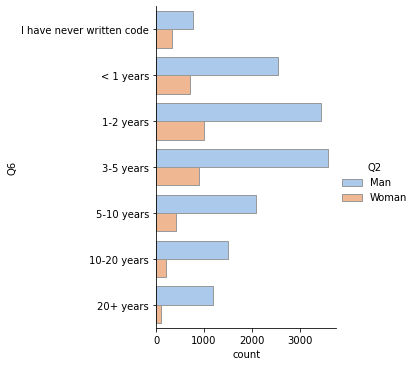

In [6]:
sns.catplot(y="Q6", hue="Q2", kind="count",
            palette="pastel", edgecolor=".6",
            data=mf, 
            order=['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years'])


In [7]:
def Q6_mean(a):
    if a == '3-5 years':
        y = 4
    elif a == '1-2 years':
        y = 1.5
    elif a == '< 1 years':
        y = 0.5
    elif a == '5-10 years':
        y = 7.5
    elif a == '10-20 years':
        y = 15
    elif a == '20+ years':
        y = 20
    else:
        y = 0
    return y

In [8]:
mf_cpy = mf.copy()

In [9]:
mf_cpy.Q6 = mf.Q6.apply(lambda x: Q6_mean(x))

In [10]:
mf_cpy.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,7.5,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,7.5,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,7.5,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,4.0,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
male = mf_cpy[mf_cpy['Q2'] == 'Man']['Q6']
female = mf_cpy[mf_cpy['Q2'] == 'Woman']['Q6']

In [12]:
np.mean(male), np.mean(female)

(5.232250300842359, 3.5563434760185664)

In [13]:
np.std(male), np.std(female)

(5.978174769373332, 4.509572048369475)

In [14]:
t,p = ttest_ind(male, female, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

ttest_ind:            t = 19.3401  p = 2.18344e-81


## Q2.2

In [15]:
survey.Q20[1:].value_counts()

0-49 employees              4208
10,000 or more employees    2238
1000-9,999 employees        1934
50-249 employees            1671
250-999 employees           1352
Name: Q20, dtype: int64

In [16]:
def Q20_mean(a):
    if a == '0-49 employees':
        y = np.random.randint(0, 50)
    elif a == '50-249 employees':
        y = np.random.randint(50, 250)
    elif a == '250-999 employees':
        y = np.random.randint(250, 1000)
    elif a == '1000-9,999 employees':
        y = np.random.randint(1000, 10000)
    else:
        y = np.random.randint(10000, 20000)
    return y

In [17]:
survey.Q24[1:].value_counts()

$0-999             2128
10,000-14,999       665
1,000-1,999         581
100,000-124,999     573
40,000-49,999       552
30,000-39,999       540
50,000-59,999       510
5,000-7,499         488
15,000-19,999       449
60,000-69,999       408
20,000-24,999       404
70,000-79,999       394
7,500-9,999         371
150,000-199,999     347
2,000-2,999         330
125,000-149,999     315
25,000-29,999       310
90,000-99,999       280
4,000-4,999         279
80,000-89,999       273
3,000-3,999         264
200,000-249,999     115
300,000-500,000      55
> $500,000           50
250,000-299,999      48
Name: Q24, dtype: int64

In [18]:
def Q24_mean(a):
    if a == '150,000-199,999':
        y = np.random.randint(150000, 200000)
    elif a == '200,000-249,999':
        y = np.random.randint(200000, 250000)
    else:
        y = np.random.randint(300000, 500000)
    return y

In [19]:
survey_cpy = survey[survey.Q24.isin(['150,000-199,999', 
                                     '200,000-249,999', 
                                     '300,000-500,000'])]

survey_cpy = survey_cpy[survey_cpy.Q20.isin(['50-249 employees', 
                                     '250-999 employees', 
                                    '1000-9,999 employees', 
                                     '10,000 or more employees'
                                   ])]

survey_cpy = survey_cpy[['Q24', 'Q20']].dropna(axis = 0)
survey_cpy.Q20 = survey_cpy.Q20.apply(lambda x: Q20_mean(x))
survey_cpy.Q24 = survey_cpy.Q24.apply(lambda x: Q24_mean(x))
survey_cpy

,Q24,Q20
25,182313,142
53,345182,11899
178,172169,912
183,172668,116
215,461912,170
...,...,...
19798,195006,9332
19870,214525,5868
19875,180147,16597
19896,231898,18606


In [20]:
y = survey_cpy.Q24
x = survey_cpy.Q20

[Text(0, 0.5, 'year composition')]

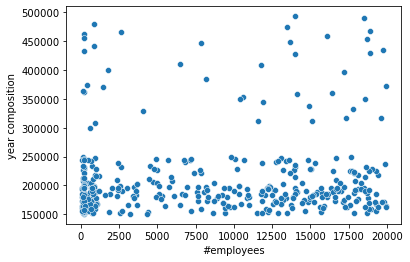

In [21]:
ax = sns.scatterplot(x = 'Q20', y= 'Q24', data = survey_cpy);
ax.set(xlabel = '#employees')
ax.set(ylabel = 'year composition')

In [22]:
outcome, predictors = patsy.dmatrices('y ~ x')
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.761
Date:                Fri, 04 Jun 2021   Prob (F-statistic):             0.0297
Time:                        19:09:29   Log-Likelihood:                -5040.8
No. Observations:                 401   AIC:                         1.009e+04
Df Residuals:                     399   BIC:                         1.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.019e+05   5394.297     37.419      0.0

<Figure size 720x288 with 0 Axes>

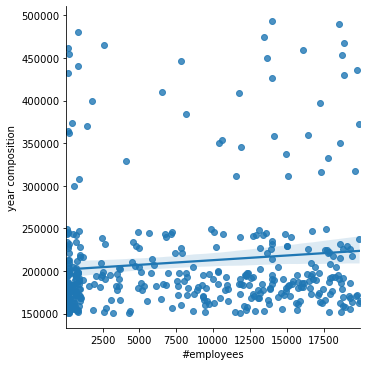

<Figure size 720x288 with 0 Axes>

In [23]:
ax = sns.lmplot(data=survey_cpy, x='Q20', y='Q24')
ax.set(xlabel = '#employees')
ax.set(ylabel = 'year composition')

plt.figure(figsize=(10,4))

## Q2.4

In [24]:
time = survey['Time from Start to Finish (seconds)'].iloc[1:].apply(lambda x:int(x))
np.mean(time)

9155.864843282092

In [25]:
binned_time = pd.qcut(time, q=[0, .2, .4, .6, .8, 1])

In [26]:
binned_time

1        (1235.0, 1144493.0]
2        (1235.0, 1144493.0]
3            (733.0, 1235.0]
4             (341.0, 533.0]
5            (19.999, 341.0]
                ...         
20032        (19.999, 341.0]
20033         (533.0, 733.0]
20034        (19.999, 341.0]
20035         (533.0, 733.0]
20036        (733.0, 1235.0]
Name: Time from Start to Finish (seconds), Length: 20036, dtype: category
Categories (5, interval[float64]): [(19.999, 341.0] < (341.0, 533.0] < (533.0, 733.0] < (733.0, 1235.0] < (1235.0, 1144493.0]]

In [27]:
np.mean(np.log(time))

6.640852369630722

## Q3

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [29]:
#For how many years have you used machine learning methods?  -- Response variable
survey.Q15.iloc[1:].value_counts() 

Under 1 year                             6312
1-2 years                                3459
I do not use machine learning methods    2075
2-3 years                                1631
3-4 years                                 893
5-10 years                                801
4-5 years                                 784
10-20 years                               244
20 or more years                          175
Name: Q15, dtype: int64

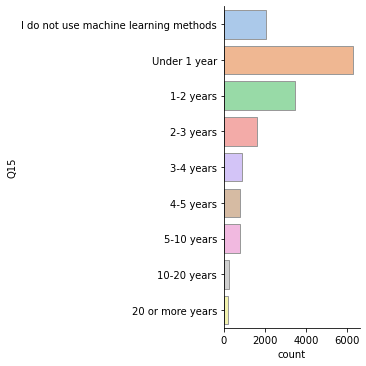

In [30]:
sns.catplot(y="Q15", kind="count",
            palette="pastel", edgecolor=".6",
            data=survey.iloc[1:],
            order = ['I do not use machine learning methods', 'Under 1 year',
                    '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years',
                    '10-20 years', '20 or more years'],
           )

In [31]:
#What is your age (# years)?
survey.Q1.iloc[1:].value_counts() 

25-29    4011
22-24    3786
18-21    3469
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

In [32]:
#What is the highest level of formal education that you have attained or plan to attain within the next 2 years
survey.Q4.iloc[1:].value_counts() 

Master’s degree                                                      7859
Bachelor’s degree                                                    6978
Doctoral degree                                                      2302
Some college/university study without earning a bachelor’s degree    1092
Professional degree                                                   699
I prefer not to answer                                                399
No formal education past high school                                  240
Name: Q4, dtype: int64

In [33]:
#For how many years have you been writing code and/or programming?
survey.Q6.iloc[1:].value_counts() 

3-5 years                    4546
1-2 years                    4505
< 1 years                    3313
5-10 years                   2552
10-20 years                  1751
20+ years                    1329
I have never written code    1124
Name: Q6, dtype: int64

In [34]:
#Select the title most similar to your current role (or most recent title if retired):
survey.Q5.iloc[1:].value_counts() 

Student                      5171
Data Scientist               2676
Software Engineer            1968
Other                        1737
Currently not employed       1652
Data Analyst                 1475
Research Scientist           1174
Machine Learning Engineer    1082
Business Analyst              798
Product/Project Manager       692
Data Engineer                 437
Statistician                  290
DBA/Database Engineer         125
Name: Q5, dtype: int64

In [35]:
preproc = ColumnTransformer(
        transformers=[
            ('one_hot1', OneHotEncoder(), ['Q1']),
            ('one_hot2', OneHotEncoder(), ['Q4']),
            ('one_hot3', OneHotEncoder(), ['Q5']),
            ('one_hot4', OneHotEncoder(), ['Q6']),
            ('one_hot5', OneHotEncoder(), ['Q11']),
            ('one_hot6', OneHotEncoder(), ['Q13']),
            
        ],
        remainder='passthrough')             
pl = Pipeline(steps=[('preprocessor', preproc), 
                     ('classifier', RandomForestClassifier(max_depth=10, 
                                                           max_features = 'auto', 
                                                           min_samples_leaf=1, 
                                                           min_samples_split=2,
                                                           n_estimators=7
                                                          )
                     )
                    ])

In [36]:
df = survey[['Q1', 'Q4', 'Q5', 'Q6', 'Q11', 'Q13','Q15']]
df = df.dropna(axis =0)
df = df.iloc[1:]

In [37]:
# features
X = df[['Q1', 'Q4', 'Q5', 'Q6', 'Q11', 'Q13']]

# outcome
y = df.Q15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

rsqr_lst = []
for i in range(100):
    pl.fit(X_train, y_train);
    rsqr = pl.score(X_test, y_test)
    rsqr_lst.append(rsqr)

np.mean(rsqr_lst)

0.43275036638983866